In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn import cluster as ct
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [21]:
x = pd.read_csv('datasets/X_dataset_cluster.csv')

# 0.0 Ensaios de Machine Learning - Clusterização

# 1.0 K-Means

In [30]:
n_cluster = np.arange(2,15)
ss_list = []
dbi_list = []
chi_list = []

for c in n_cluster:
        # model definition
        k_means = ct.KMeans(n_clusters= c, verbose=0)

        # model training
        labels = k_means.fit_predict(x)

        # model performance 
        ss_avg = mt.silhouette_score(x, labels)
        #ss_list.append(ss_avg)
        ss_list.append(ss_avg)
        
        dbi_score = davies_bouldin_score(x, labels)
        dbi_list.append(dbi_score)
        
        chi_score = calinski_harabasz_score(x, labels)
        chi_list.append(chi_score)
        

c:\Users\rseme\anaconda3\envs\ensaiosML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rseme\anaconda3\envs\ensaiosML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rseme\anaconda3\envs\ensaiosML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rseme\anaconda3\envs\ensaiosML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

Text(0, 0.5, 'silhouete avarage score')

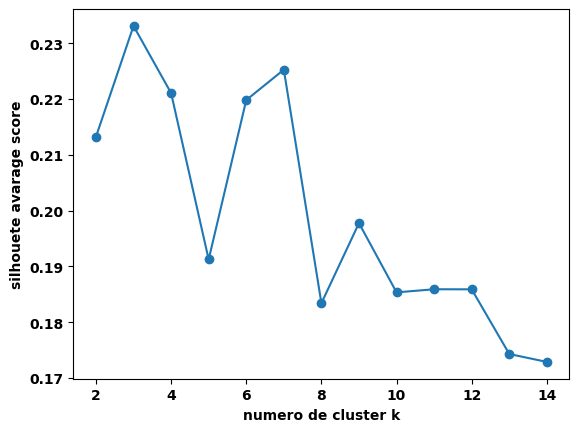

In [31]:
# Elbow method

plt.plot(n_cluster, ss_list, marker = 'o')
plt.xlabel('numero de cluster k')
plt.ylabel('silhouete avarage score')

Text(0, 0.5, 'dbi score')

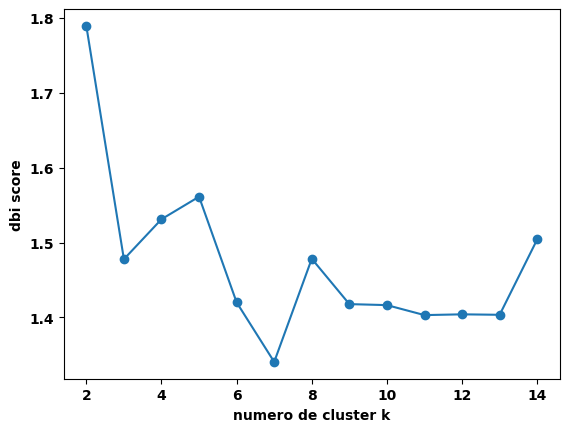

In [32]:
plt.plot(n_cluster, dbi_list, marker = 'o')
plt.xlabel('numero de cluster k')
plt.ylabel('dbi score')

Text(0, 0.5, 'chi score')

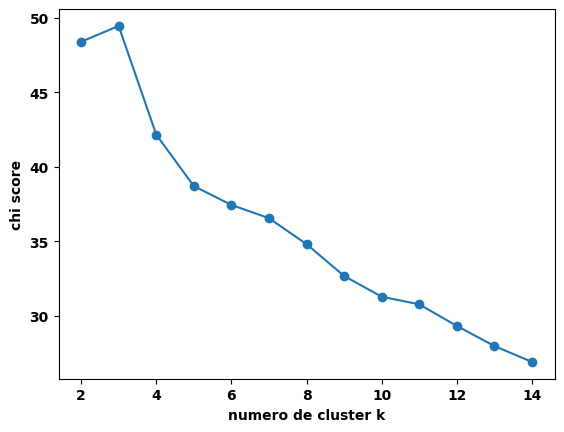

In [33]:
plt.plot(n_cluster, chi_list, marker = 'o')
plt.xlabel('numero de cluster k')
plt.ylabel('chi score')

In [60]:
# model definition
k_means = ct.KMeans(n_clusters= 3, verbose=0)

# model training
labels = k_means.fit_predict(x)

# model performance 
ss_avg = mt.silhouette_score(x, labels)
ss_avg

c:\Users\rseme\anaconda3\envs\ensaiosML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rseme\anaconda3\envs\ensaiosML\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.2331050172234707

# 2.0 Affinity Propagation

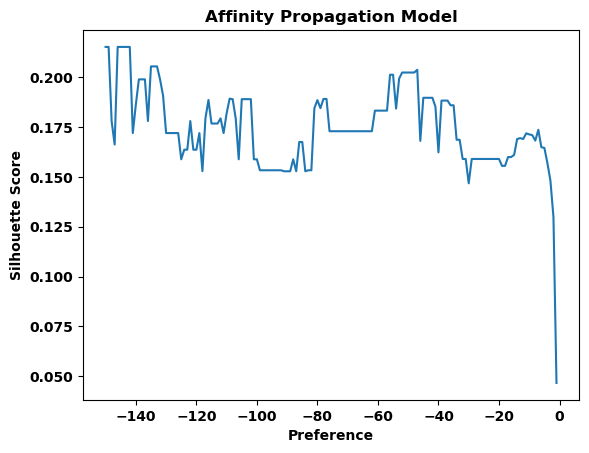

In [64]:
p = np.arange(-1, -151, -1)
fig = plt.figure()
ss_list = []

for i in range(len(p)):

    # Model
    model = ct.AffinityPropagation(preference=p[i])

    # Fit 
    model.fit(x)

    # Predict
    labels = model.predict(x)

    # Performance
    ss = mt.silhouette_score(x, labels)
    ss_list.append(ss)

plt.plot(p, ss_list)
plt.title('Affinity Propagation Model')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.show()

In [63]:
p_best = ss_list.index(max(ss_list))
ap = ct.AffinityPropagation(preference = p[p_best])
ap.fit(x)
labels = ap.predict(x)
print(f'Número de clusters encontrados: {len(np.unique(labels))}')
print(f'silhouete score: {max(ss_list):.3f}')

Número de clusters encontrados: 3
silhouete score: 0.215


In [61]:
p_best

141